Principal Component Analysis (PCA) is a statistical technique used in the field of data analysis and machine learning for dimensionality reduction while preserving as much of the data's variation as possible. It's particularly useful when dealing with high-dimensional data, helping to simplify the data without losing the underlying structure. These components are orthogonal (meaning they are statistically independent of one another), and are ordered so that the first few retain most of the variation present in all of the original variables. There are a number of uses for PCA, including:

- **Visualization**: By reducing data to two or three principal components, PCA allows for the visualization of complex data in a 2D or 3D space.

- **Noise Reduction**: By eliminating components with low variance and retaining those with high variance, PCA can help in reducing noise in the dataset.

- **Feature Extraction and Data Compression**: PCA can help in extracting the most important features from the data, which can then be used for further analysis or machine learning modeling. It also helps in compressing the data by reducing the number of dimensions without losing significant information.

- **Improving Model Performance**: By reducing the dimensionality, PCA can lead to simpler models that are less prone to overfitting when training on datasets with a high number of features.

<br>

There are some limitations to PCA, specifically:

- **Linear Assumptions**: PCA assumes that the principal components are a linear combination of the original features, which may not always capture the structure of the data well, especially if the underlying relationships are non-linear.

- **Sensitivity to Scaling**: Since PCA is affected by the scale of the features, different results can be obtained if the scaling of the data changes.

- **Data Interpretation**: Interpretability of the principal components can be difficult since they are combinations of all original features.

<br>

The spread of a dataset can be expressed in orthonormal vectors – the principal directions of the dataset. Orthonormal means that the vectors are orthogonal to each other (i.e. they have an angle of 90 degrees) and are of size 1. By sorting these vectors in order of importance (by looking at their relative contribution to the spread of the data as a whole), we can find the dimensions of the data which explain the most variance. We can then reduce the number of dimensions to the most important ones only. Finally, we can project our dataset onto these new dimensions, called the principal components, performing 
dimensionality reduction without losing much of the information present in the dataset.

In what follows, PCA is demonstrated from scratch using Numpy and the results compared with scikit-learn to show they are identical up to a sign. 

<br>


### Extracting the first k Principal Components

We start by 0-centering the data, then compute the Singular Value Decomposition (SVD) of the data matrix $A$, where rows of $A$ are assumed to be samples and columns the features. For any $m \times n$ data matrix $A$, the SVD factors $A = U \Sigma V^{T}$ where:

- $U$ = an $m \times m$ orthogonal matrix whose columns are the left singular vectors of $A$.

- $V$ = an $n \times n$ orthogonal matrix whose columns are the right singular vectors of $A$.

- $\Sigma$ = is an $m \times n$ diagonal matrix containing the singular values of $A$ in descending order along the diagonal. These values are non-negative and are the square roots of the eigenvalues of both $A^{T}A$ and $AA^{T}$.

The remaining steps are shown in code below:


In [1]:

import numpy as np

np.set_printoptions(suppress=True, precision=8, linewidth=1000)

rng = np.random.default_rng(516)


# Specify the number of principal components to retain.
k = 5

# Create random matrix with 100 samples and 50 features.
Xinit = rng.normal(loc=100, scale=12.5, size=(100, 50))

# 0-center columns in Xinit. Each column will now have mean 0. 
X = Xinit - Xinit.mean(axis=0)

# Compute SVD of 0-centered data matrix X.
# U : (100, 100) Columns represent left singular vectors.
# VT: (50, 50) Rows represent right singular vectors.
# S : (50,) Represents singular values of X. 
U, S, VT = np.linalg.svd(X)

# Apply dimensionality reduction (retain first k principal components).
# Xpca1 will have shape 100 x k. 
Xpca1 = X @ VT[:k].T

print(f"Xpca1.shape: {Xpca1.shape}")


Xpca1.shape: (100, 5)


This returns the top-5 principal components from the 0-centered data matrix $X$. This transformation can also be carried out in scikit-learn as follows:

In [2]:

from sklearn.decomposition import PCA

# Call pca.fit on 0-centered data matrix.
pca = PCA(n_components=k)
pca.fit(X)

Xpca2 = pca.transform(X)

print(f"Xpca2.shape: {Xpca2.shape}")



Xpca2.shape: (100, 5)


The first few rows of `Xpca1` and `Xpca2` can be compared. Notice that they are identical up to a sign:

In [3]:
Xpca1[:10, :]

array([[ -1.0024489 ,  -8.45086232,  13.05495528, -32.18002702,   6.1897014 ],
       [ 38.32532794,   3.10016467, -34.9065906 ,  -4.45684708, -18.03986151],
       [  2.50382601,  29.88906322, -18.83018377,  -9.64833693, -18.46252148],
       [ -4.57804661,  -1.16308008,  22.67820152, -15.25819358, -12.15373192],
       [ -4.01382494,  -8.4219436 ,  18.33661249,   7.327393  ,  20.1264191 ],
       [ 15.97152692,   0.03394136, -17.74609475,  21.77608653, -23.06117564],
       [-19.18606004, -44.7392649 , -47.83180773,  -1.30574016, -33.77155819],
       [ 35.1510225 ,  -8.16265381,  21.78210602,  23.30058147,  26.5255693 ],
       [ 47.57005479, -39.33886869,   0.91133253,  10.09394219,   9.24710166],
       [-30.05011125,  13.09734398,  17.8311663 ,  13.25098519, -14.39827404]])

In [4]:
Xpca2[:10, :]

array([[  1.0024489 ,  -8.45086232, -13.05495528,  32.18002702,  -6.1897014 ],
       [-38.32532794,   3.10016467,  34.9065906 ,   4.45684708,  18.03986151],
       [ -2.50382601,  29.88906322,  18.83018377,   9.64833693,  18.46252148],
       [  4.57804661,  -1.16308008, -22.67820152,  15.25819358,  12.15373192],
       [  4.01382494,  -8.4219436 , -18.33661249,  -7.327393  , -20.1264191 ],
       [-15.97152692,   0.03394136,  17.74609475, -21.77608653,  23.06117564],
       [ 19.18606004, -44.7392649 ,  47.83180773,   1.30574016,  33.77155819],
       [-35.1510225 ,  -8.16265381, -21.78210602, -23.30058147, -26.5255693 ],
       [-47.57005479, -39.33886869,  -0.91133253, -10.09394219,  -9.24710166],
       [ 30.05011125,  13.09734398, -17.8311663 , -13.25098519,  14.39827404]])

The reason for the discrepancy is due to the fact that each singular vector is only uniquely determined up to sign, indeed in more generality it is only defined up to complex sign (i.e. up to multiplication by a complex number of modulus 1). For a deeper mathematical explanation of this, check out [this](https://math.stackexchange.com/questions/1805191/calculating-svd-by-hand-resolving-sign-ambiguities-in-the-range-vectors/1805239#1805239) link.


<br>

### Assessing Reconstruction Error

Once the principal components of a data matrix have been identified, we can get an idea of how well using k components approximates the original matrix. If we use all principal components, we should be able to recreate the data exactly. The objective is to identify some reduced number of components that captures enough variance in the original data while also eliminating redundant components. Thus, minimizing the reconstruction error is equivalent 
to maximizing the variance of the projected data. Using the `pca.inverse_transform` method, we can project our k-component matrix back into signal space (100 x 50 for our example), and compute the reconstruction error (the average difference between the original data matrix and our projected matrix):

In [5]:

reconstruction_error = []

for jj in range(1, X.shape[1] + 1):
    pca = PCA(n_components=jj).fit(X)
    Xpca = pca.transform(X) 
    Xhat = pca.inverse_transform(Xpca)
    err = np.mean(np.sum((X - Xhat)**2, axis=1))
    reconstruction_error.append((jj, err))


<br>

We can then plot the recosntruction error as a function of the number of retained components:

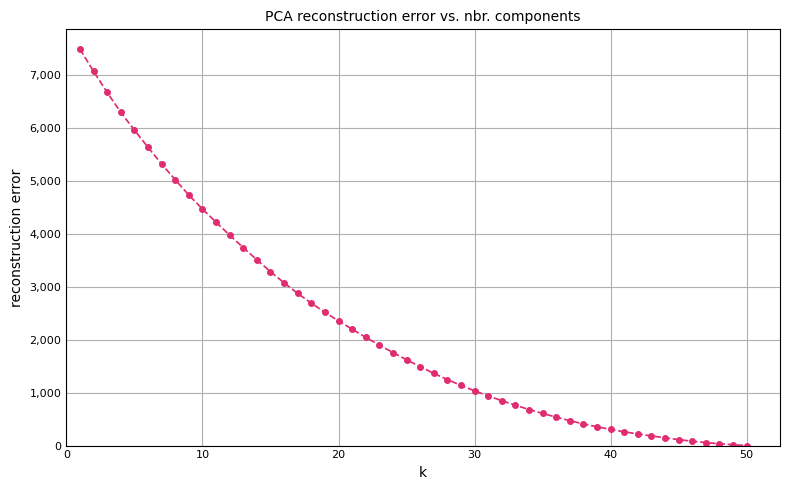

In [6]:

# Plot reconstruction error as a function of k-components.
import matplotlib as mpl
import matplotlib.pyplot as plt

xx, yy = zip(*reconstruction_error)

fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)
ax.set_title("PCA reconstruction error vs. nbr. components", fontsize=10)
ax.plot(xx, yy, color="#E02C70", linestyle="--", linewidth=1.25, markersize=4, marker="o")
ax.set_xlabel("k", fontsize=10)
ax.set_ylabel("reconstruction error", fontsize=10)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.tick_params(axis="x", which="major", direction="in", labelsize=8)
ax.tick_params(axis="y", which="major", direction="in", labelsize=8)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.grid(True)

plt.show()

A few things to note about the reconstruction error curve:

- We started with random normal data, so there was no information in the original features to begin with. When applied to real-world data, you will typically see a sharp decrease in reconstruction error after some small set of k-components. 

- Notice when k = 50, the reconstruction error drops to 0. With 50 components, we are able to reproduce the original data exactly.


### PCA Loadings

PCA loadings are the coefficients of the linear combination of the original variables from which the principal components are constructed. From the scikit-learn's `pca` output, we simply need to access the `pca.components_` attribute, the rows of which contain the eigenvectors associated with the first k principal components:

In [7]:
import pandas as pd

pca = PCA(n_components=2)
pca.fit(X)

dfloadings = pd.DataFrame(pca.components_.T, columns=["pc1", "pc2"]).sort_values("pc1", ascending=False, key=abs)
dfloadings.head(10)


,pc1,pc2
27,0.367146,-0.153378
41,0.342124,0.050818
39,-0.302304,0.010788
34,-0.296221,-0.198985
45,0.260603,-0.155375
31,0.238631,-0.023786
21,0.198101,-0.186968
29,-0.191818,0.039887
20,0.191115,0.011552
37,0.173049,-0.032115



The interpretation of this output is that the coefficient for column index 27 is .367146, and is the largest contributor to the score for each observation when applied to the original data.

We can show how the loadings are used to compute the PCA scores for the first sample in the dataset. Let's find the first principal component of our original 0-centered data matrix $X$:


In [8]:

pca = PCA(n_components=1)
Xpca = pca.fit_transform(X)

print(Xpca[0])


[1.0024489]



The value 1.0024489 is obtained by computing the dot product of the first principal component loading with the first row in $X$:

In [9]:

np.dot(pca.components_.T.ravel(), X[0, :])


1.0024488966036473

### Loading Plot

PCA loading plots are visual tools used to interpret the results of PCA by showing how much each variable contributes to the principal components. These plots help in understanding the underlying structure of the data and in identifying which variables are most important in driving the differences between observations. They provide insight into the relationship between the variables and the principal components. In the next cell, we show how to create a loading plot for the iris dataset in scikit-learn.



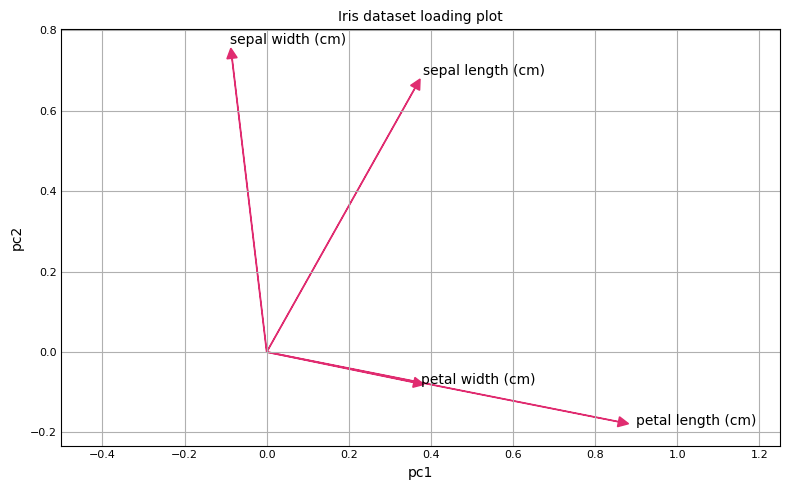

In [10]:

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load iris data.
data = load_iris()
X = data["data"]
feature_names = data["feature_names"]


pca = PCA(n_components=2)
pca.fit(X)
loadings = pca.components_.T


# Create loading plot.
fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True)
ax.set_title("Iris dataset loading plot", fontsize=10)
for ii, feature in enumerate(feature_names):
    ax.arrow(0, 0, loadings[ii, 0], loadings[ii, 1], head_width=0.025, head_length=0.025, color="#E02C70")
    ax.text(loadings[ii, 0] * 1.05, loadings[ii, 1] * 1.05, feature, color="#000000")

ax.set_xlim(-.5, 1.25) 
ax.set_xlabel("pc1", fontsize=10)
ax.set_ylabel("pc2", fontsize=10)
ax.tick_params(axis="x", which="major", direction="in", labelsize=8)
ax.tick_params(axis="y", which="major", direction="in", labelsize=8)
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.grid(True)

plt.show()


In the direction of the first principal component, petal length has the largest effect, whereas sepal length is the dominant feature in the direction of the second principal component. 

### Using PCA in ML Pipeline

How might we use PCA in a typical machine learning workflow?

```python
from sklearn.decomposition import PCA

pca = PCA(n_components=5).fit(Xtrain)
Xtrain_pca = pca.transform(Xtrain)
Xtest_pca = pca.transform(Xtest)
```

Xtrain and Xtest would then be used as the train and test sets as in any other machine learning setup. Note that we call `fit` on the training set, then only `transform` on the test set. This prevents information from the test set leaking into the training data. `Xtrain_pca` and `Xtest_pca` will have the same number of rows as `Xtrain` and `Xtest`, but will only have 5 features, which will be less than or equal to the number of features in  `Xtrain` and `Xtest`.

